# Imports

In [1]:
import pandas as pd 
import numpy as np 

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2023-07-27 15:15:09.603036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading CSV

In [3]:
music = pd.read_csv('/Users/kellyjara/Desktop/Music_Classification/Data/music_2.csv')
music_df = pd.DataFrame(music)

## OneHotEncoding Genres

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
genres_df = music_df[['genre_y']]

In [6]:
ohe = OneHotEncoder(sparse = False)

genres_ohe = ohe.fit_transform(genres_df)

ohe_df = pd.DataFrame(genres_ohe, columns = ohe.get_feature_names_out(['genre_y']))

df = pd.concat([music_df, ohe_df], axis = 1)

df.drop(columns = ['genre_y'], inplace = True)

In [7]:
df.drop(columns = 'file_name', inplace = True)

In [8]:
df.drop(columns = 'genre_x', inplace = True)

In [9]:
df

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,genre_y_blues,genre_y_classical,genre_y_country,genre_y_disco,genre_y_hiphop,genre_y_jazz,genre_y_metal,genre_y_pop,genre_y_reggae,genre_y_rock
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,-147.263640,88.613090,-5.508493,17.767538,3.232844,3.489528,1.577688,4.755512,-5.777406,5.531152,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1728,-117.149660,99.081245,-0.484232,26.842184,4.783892,6.124170,-1.773161,8.033392,-0.388932,4.132214,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1729,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1730,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          1732 non-null   float64
 1   mfcc_var           1732 non-null   float64
 2   mfcc_min           1732 non-null   float64
 3   mfcc_max           1732 non-null   float64
 4   mfcc1_mean         1732 non-null   float64
 5   mfcc1_var          1732 non-null   float64
 6   mfcc1_min          1732 non-null   float64
 7   mfcc1_max          1732 non-null   float64
 8   mfcc2_mean         1732 non-null   float64
 9   mfcc2_var          1732 non-null   float64
 10  mfcc2_min          1732 non-null   float64
 11  mfcc2_max          1732 non-null   float64
 12  delta_mean         1732 non-null   float64
 13  delta_var          1732 non-null   float64
 14  delta2_mean        1732 non-null   float64
 15  delta2_var         1732 non-null   float64
 16  harmonic_mean      1732 

## Train-Test-Split

In [11]:
X = df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [12]:
#train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30)

#validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20)

In [13]:
#normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [14]:
X_train_scaled.shape

(969, 39)

### RNN LSTM Model

In [15]:
from tensorflow import keras
import tensorflow as tf

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=32, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=10, activation='softmax')
])


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 39, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 39, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=65, batch_size=175, validation_data=(X_val_scaled, y_val))

Epoch 1/65
6/6 [==============================] - 6s 371ms/step - loss: 2.2938 - accuracy: 0.1094 - val_loss: 2.2662 - val_accuracy: 0.1728
Epoch 2/65
6/6 [==============================] - 1s 193ms/step - loss: 2.2481 - accuracy: 0.1393 - val_loss: 2.1775 - val_accuracy: 0.1975
Epoch 3/65
6/6 [==============================] - 1s 194ms/step - loss: 2.2023 - accuracy: 0.1404 - val_loss: 2.1367 - val_accuracy: 0.2305
Epoch 4/65
6/6 [==============================] - 1s 196ms/step - loss: 2.1822 - accuracy: 0.1589 - val_loss: 2.1213 - val_accuracy: 0.2140
Epoch 5/65
6/6 [==============================] - 1s 195ms/step - loss: 2.1443 - accuracy: 0.1703 - val_loss: 2.0871 - val_accuracy: 0.2099
Epoch 6/65
6/6 [==============================] - 1s 195ms/step - loss: 2.1529 - accuracy: 0.1713 - val_loss: 2.0869 - val_accuracy: 0.2181
Epoch 7/65
6/6 [==============================] - 1s 195ms/step - loss: 2.1177 - accuracy: 0.1868 - val_loss: 2.0600 - val_accuracy: 0.2428
Epoch 8/65
6/6 [====

6/6 [==============================] - 1s 199ms/step - loss: 1.4722 - accuracy: 0.4850 - val_loss: 1.5432 - val_accuracy: 0.4115
Epoch 60/65
6/6 [==============================] - 1s 201ms/step - loss: 1.4901 - accuracy: 0.4830 - val_loss: 1.5244 - val_accuracy: 0.4321
Epoch 61/65
6/6 [==============================] - 1s 195ms/step - loss: 1.4720 - accuracy: 0.4788 - val_loss: 1.5787 - val_accuracy: 0.4280
Epoch 62/65
6/6 [==============================] - 1s 195ms/step - loss: 1.4405 - accuracy: 0.5088 - val_loss: 1.5192 - val_accuracy: 0.4280
Epoch 63/65
6/6 [==============================] - 1s 194ms/step - loss: 1.4498 - accuracy: 0.4974 - val_loss: 1.5351 - val_accuracy: 0.4362
Epoch 64/65
6/6 [==============================] - 1s 195ms/step - loss: 1.4204 - accuracy: 0.5119 - val_loss: 1.5187 - val_accuracy: 0.4733
Epoch 65/65
6/6 [==============================] - 1s 198ms/step - loss: 1.4383 - accuracy: 0.4923 - val_loss: 1.5528 - val_accuracy: 0.4321


In [20]:
loss, accuracy = model.evaluate(X_train_scaled, y_train)
print(f":loss: {loss}, accuracy: {accuracy}")

31/31 [==============================] - 1s 21ms/step - loss: 1.2393 - accuracy: 0.5728
:loss: 1.239345908164978, accuracy: 0.5727553963661194


In [21]:
test_loss = model.evaluate(X_val_scaled, y_val)

# Print the evaluation result
print(f'Test Loss: {test_loss}')

8/8 [==============================] - 0s 21ms/step - loss: 1.5528 - accuracy: 0.4321
Test Loss: [1.5527642965316772, 0.43209877610206604]


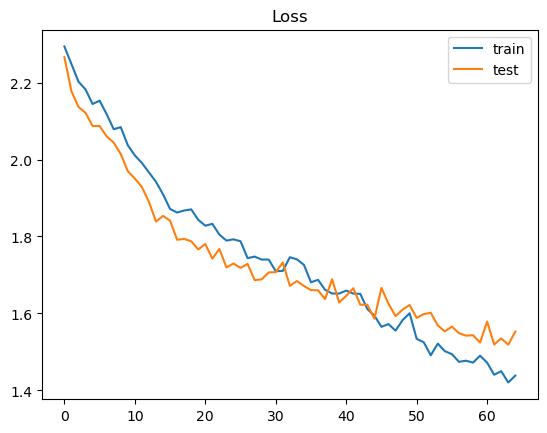

In [22]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

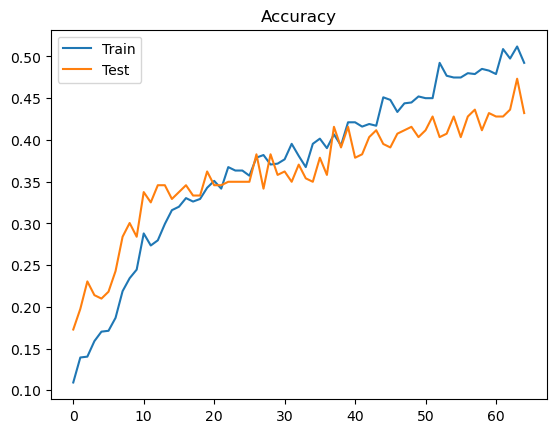

In [23]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = "Test")
plt.legend()
plt.show()